# Initial Check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize']=[15,8]
import warnings 
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import LabelBinarizer,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [3]:
train=pd.read_csv('~/documents/job_a_thon/train.csv')

In [4]:
train.shape

(39161, 19)

In [5]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [342]:
train[train['buy']==1]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
144,145,2021-01-05,4,5,2.0,2019-02-12,1,0,1,1,1,1,0,0,0,0,0,0,1
159,160,2021-01-05,5,7,3.0,2016-03-11,1,0,0,0,1,1,1,0,0,0,0,0,1
173,174,2021-01-05,6,3,NaN,2020-11-13,0,1,0,0,1,0,0,0,0,0,0,0,1
178,179,2021-01-06,8,9,NaN,2018-07-23,1,0,0,1,1,0,0,0,1,0,0,0,1
274,275,2021-01-08,3,4,2.0,2020-03-01,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39071,39072,2021-12-31,6,6,NaN,2021-01-01,0,0,1,1,1,1,0,0,0,0,1,0,1
39086,39087,2021-12-31,7,5,1.0,2021-01-17,1,0,0,1,0,0,0,0,0,0,1,0,1
39103,39104,2021-12-31,3,5,2.0,2021-09-30,1,0,0,0,0,1,0,0,0,0,2,0,1
39129,39130,2021-12-31,6,6,NaN,2019-05-19,1,0,0,0,0,1,0,0,0,0,1,0,1


In [6]:
test=pd.read_csv('~/documents/job_a_thon/test.csv')

In [7]:
#Lets check data types of the columns

In [8]:
train.dtypes

id                        int64
created_at               object
campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
signup_date              object
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
dtype: object

In [9]:
train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [10]:
#products_purchased and #csignupdate has lots of null values in it

In [11]:
#Lets check imbalance if any in target buy

In [12]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [13]:
#It is highly imbalanced as we can see

In [14]:
train['buy'].value_counts()*100/train['buy'].value_counts().sum()

0    94.897985
1     5.102015
Name: buy, dtype: float64

In [15]:
#Imbalance in train and test are same

In [16]:
#Lets check how many categories are there in each columns

In [17]:
for i in train.columns:
    print(i,'\n',train[i].unique())

id 
 [    1     2     3 ... 39159 39160 39161]
created_at 
 ['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03-07' '2021-03-08' '2021-03-09' '2021-03-10' '2021-03-11'
 '2021-03-12' '2

In [18]:
for i in test.columns:
    print(i,'\n',test[i].unique())

id 
 [39162 39163 39164 ... 52343 52344 52345]
created_at 
 ['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10'
 '2022-01-11' '2022-01-12' '2022-01-13' '2022-01-14' '2022-01-15'
 '2022-01-16' '2022-01-17' '2022-01-18' '2022-01-19' '2022-01-20'
 '2022-01-21' '2022-01-22' '2022-01-23' '2022-01-24' '2022-01-25'
 '2022-01-26' '2022-01-27' '2022-01-28' '2022-01-29' '2022-01-30'
 '2022-01-31' '2022-02-01' '2022-02-02' '2022-02-03' '2022-02-04'
 '2022-02-05' '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09'
 '2022-02-10' '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14'
 '2022-02-15' '2022-02-16' '2022-02-17' '2022-02-18' '2022-02-19'
 '2022-02-20' '2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24'
 '2022-02-25' '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01'
 '2022-03-02' '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06'
 '2022-03-07' '2022-03-08' '2022-03-09' '2022-03-10' '2022-03-11'
 '2022-03-12' '2

# Preprocessing and EDA

In [19]:
#We can just see that almost all vaiables except id and dates are categorical in nature

In [20]:
#lets create a simple copy and impute using knn imputer

In [21]:
train_copy1=train.copy()
test_copy1=test.copy()

In [22]:
train_copy1['signup_day']=pd.to_datetime(train_copy1['signup_date']).dt.day

In [23]:
train_copy1['signup_year']=pd.to_datetime(train_copy1['signup_date']).dt.year

In [24]:
train_copy1['signup_month']=pd.to_datetime(train_copy1['signup_date']).dt.month

In [25]:
test_copy1['signup_day']=pd.to_datetime(test_copy1['signup_date']).dt.day
test_copy1['signup_month']=pd.to_datetime(test_copy1['signup_date']).dt.month
test_copy1['signup_year']=pd.to_datetime(test_copy1['signup_date']).dt.year

In [472]:
test_copy1['signup_year'].unique()<10

array([False, False, False, False, False, False, False, False, False])

In [26]:
train_copy1.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup_day,signup_year,signup_month
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,1,1,0,0,0,0,0,24.0,2020.0,9.0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,1,0,0,0,0,0,0,19.0,2020.0,9.0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,0,0,11.0,2021.0,8.0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,0,0,4.0,2017.0,10.0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,...,1,0,0,0,1,0,0,8.0,2020.0,6.0


In [27]:
test_copy1.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,signup_day,signup_month,signup_year
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,...,1,0,0,0,0,1,0,17.0,8.0,2021.0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,...,0,0,1,0,0,0,0,21.0,5.0,2020.0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,...,1,0,0,0,0,0,0,NaN,NaN,NaN
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,...,1,1,0,0,0,2,0,22.0,6.0,2020.0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,...,0,0,0,0,0,0,0,10.0,3.0,2021.0


In [452]:
len(test_copy1['created_at_month'].unique())

3

In [444]:
test_copy1['created_at_year'].unique()

array([2022], dtype=int64)

In [28]:
train_copy1['created_at_day']=pd.to_datetime(train_copy1['created_at']).dt.day
train_copy1['created_at_month']=pd.to_datetime(train_copy1['created_at']).dt.month
train_copy1['created_at_year']=pd.to_datetime(train_copy1['created_at']).dt.year

In [29]:
test_copy1['created_at_day']=pd.to_datetime(test_copy1['created_at']).dt.day
test_copy1['created_at_month']=pd.to_datetime(test_copy1['created_at']).dt.month
test_copy1['created_at_year']=pd.to_datetime(test_copy1['created_at']).dt.year

In [471]:
test_copy1['created_at_year'].unique()

array([2022], dtype=int64)

In [30]:
train_copy1.dtypes

id                        int64
created_at               object
campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
signup_date              object
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
signup_day              float64
signup_year             float64
signup_month            float64
created_at_day            int64
created_at_month          int64
created_at_year           int64
dtype: object

In [31]:
#lets create the train_copy 2 dataset and drop them from previous dataset

In [32]:
train_copy1.shape

(39161, 25)

In [33]:
test_copy1.shape

(13184, 24)

In [34]:
train_copy2=train_copy1.drop(['signup_date','created_at'],axis=1)
test_copy2=test_copy1.drop(['signup_date','created_at'],axis=1)

In [473]:
train_knn=train_copy2.copy()
test_knn=test_copy2.copy()

In [35]:
imputer1 = IterativeImputer()
# fit on the dataset
train_imputed=imputer1.fit_transform(train_copy2.drop('buy',axis=1))
# transform the dataset

In [36]:
test_imputed = imputer1.transform(test_copy2)

In [477]:
from  sklearn.neighbors import KNeighborsRegressor

In [478]:
knn=KNeighborsRegressor()

In [479]:
imputer2 = IterativeImputer(estimator=knn)
train_imputed2=imputer2.fit_transform(train_copy2.drop('buy',axis=1))

In [480]:
test_imputed2=imputer2.transform(test_copy2)

In [344]:
train_copy3=pd.DataFrame(train_imputed,columns=train_copy2.drop('buy',axis=1).columns)
test_copy3=pd.DataFrame(test_imputed,columns=test_copy2.columns)

In [382]:
train_copy3['buy']=train_copy2['buy']

In [481]:
train_knn=pd.DataFrame(train_imputed2,columns=train_copy2.drop('buy',axis=1).columns)
test_knn=pd.DataFrame(test_imputed2,columns=test_copy2.columns)

In [482]:
train_knn['buy']=train_copy2['buy']

# Base Model - Logistic Regression 

In [39]:
def lr_output(x,y):
   
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
   
    lr=LogisticRegression(class_weight='balanced',penalty='l1',solver='liblinear')
    lr.fit(xtrain, ytrain)
    y_pred=lr.predict(xtest)
    pred_train=lr.predict(xtrain)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [40]:
#Above function gives all the report with respect to logistic_regression

In [383]:
x=train_copy3.drop('buy',axis=1)
y=train_copy3['buy']
lr_output(x,y)

confusion_matrix_test 
 [[8019 1275]
 [  98  399]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      9294
           1       0.24      0.80      0.37       497

    accuracy                           0.86      9791
   macro avg       0.61      0.83      0.64      9791
weighted avg       0.95      0.86      0.89      9791
 

confusion_matrix_train 
 [[24147  3722]
 [  292  1209]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.99      0.87      0.92     27869
           1       0.25      0.81      0.38      1501

    accuracy                           0.86     29370
   macro avg       0.62      0.84      0.65     29370
weighted avg       0.95      0.86      0.90     29370
 

roc_auc_score_train 
 roc_auc_score 0.8359548070253211 

roc_auc_score_test 
 roc_auc_score 0.8328158102910556 



In [42]:
def rfc_output(x,y):
   
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
    
    rf=RandomForestClassifier(class_weight='balanced_subsample')
    rf.fit(xtrain, ytrain)
    y_pred=rf.predict(xtest)
    pred_train=rf.predict(xtrain)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [43]:
rfc_output(x,y)

confusion_matrix_test 
 [[9283   11]
 [ 229  268]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9294
           1       0.96      0.54      0.69       497

    accuracy                           0.98      9791
   macro avg       0.97      0.77      0.84      9791
weighted avg       0.98      0.98      0.97      9791
 

confusion_matrix_train 
 [[27869     0]
 [    0  1501]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27869
           1       1.00      1.00      1.00      1501

    accuracy                           1.00     29370
   macro avg       1.00      1.00      1.00     29370
weighted avg       1.00      1.00      1.00     29370
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_score_test 
 roc_auc_score 0.7690259265946442 



In [44]:
rf1=RandomForestClassifier(class_weight='balanced_subsample')
rf1.fit(x, y)
y_pred1=rf1.predict(test_copy3)


In [45]:
sub_1=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_1['buy']=y_pred1
sub_1.to_csv('sub_1.csv',index=False)

In [46]:
#This gave highest f1 of around 0.73 by now.

# 

In [47]:
def dt_output(x,y):
    
    dt=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=25)
    
    
    output_cross=cross_validate(estimator=dt,X=x,y=y,cv=8,scoring='f1',return_train_score=True)
    output_cross_df=pd.DataFrame({'Train_score':output_cross['train_score'],'Test_score':output_cross['test_score']})
    print('train_mean',output_cross_df['Train_score'].mean())
    print('train_std',output_cross_df['Train_score'].std())
    print('test_mean',output_cross_df['Test_score'].mean())
    print('test_std',output_cross_df['Test_score'].std())
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
    xtrain_final=xtrain
    xtest_final=xtest
  
    dt.fit(xtrain_final, ytrain)
    y_pred=dt.predict(xtest_final)
    pred_train=dt.predict(xtrain_final)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [48]:
dt_output(x,y)

train_mean 0.8502652913802516
train_std 0.04564742181490849
test_mean 0.44600425741066985
test_std 0.13735624116118283
confusion_matrix_test 
 [[8927  367]
 [ 180  317]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      9294
           1       0.46      0.64      0.54       497

    accuracy                           0.94      9791
   macro avg       0.72      0.80      0.75      9791
weighted avg       0.95      0.94      0.95      9791
 

confusion_matrix_train 
 [[27432   437]
 [    3  1498]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     27869
           1       0.77      1.00      0.87      1501

    accuracy                           0.99     29370
   macro avg       0.89      0.99      0.93     29370
weighted avg       0.99      0.99      0.99     29370
 

roc_auc_score_train 
 roc_auc_score 0.991160413612091

In [49]:
#In the below iterations different variations of xgboost is tried.

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)

In [51]:
xtrain.shape

(29370, 22)

In [52]:
ytrain.shape

(29370,)

In [53]:
xgb_classifier=XGBClassifier()

In [54]:
from sklearn.utils import class_weight
weight=len(y[y==0])/len(y[y==1])


In [55]:
len(y[y==0])

37163

In [56]:
len(y[y==1])

1998

In [57]:
weight

18.6001001001001

In [58]:
xgb=XGBClassifier(scale_pos_weight=weight)

In [59]:
xgb.fit(x,y)

[19:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=18.6001001001001,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
y_pred2=xgb.predict(test_copy3)

In [61]:
sub_2=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_2['buy']=y_pred2
sub_2.to_csv('sub_2.csv',index=False)

In [62]:
#f1 score received is around 0.42.

In [63]:
xgb2=XGBClassifier()
xgb2.fit(x,y)
y_pred3=xgb2.predict(test_copy3)

[19:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
sub_3=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_3['buy']=y_pred3
sub_3.to_csv('sub_3.csv',index=False)

In [65]:
weight2=len(y[y==1])/len(y[y==0])
xgb3=XGBClassifier(scale_pos_weight=weight2)
xgb3.fit(x,y)
y_pred4=xgb2.predict(test_copy3)

[19:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
sub_4=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_4['buy']=y_pred4
sub_4.to_csv('sub_4.csv',index=False)

In [67]:
#Tried different ways no improvement in xgb classifier

In [68]:
#lets try adjusting weights of random forest classifier

In [335]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights1 = np.linspace(0.0,0.99,100)

#Creating a dictionary grid for grid search
param_grid1 = {'class_weight': [{0:x, 1:1.0-x} for x in weights1]}

#Fitting grid search to the train data with 5 folds
gridsearch1 = GridSearchCV(estimator= lr, 
                          param_grid= param_grid1,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2)
gridsearch1.fit(x,y)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(solver='newton-cg'), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.01, 1: 0.99},
                                          {0: 0.02, 1: 0.98},
                                          {0: 0.03, 1: 0.97},
                                          {0: 0.04, 1: 0.96},
                                          {0: 0.05, 1: 0.95},
                                          {0: 0.06, 1: 0.94},
                                          {0: 0.07, 1: 0.9299999999999999},
                                          {0: 0.08, 1: 0.92},
                                          {0: 0.09, 1: 0.91}, {0: 0.1, 1: 0.9},
                                          {0: 0.11, 1: 0.89},
                                          {0: 0.12, 1: 0.88},
                                          {0: 0.13, 1: 0.87},
                                          {0: 0.14, 1

Text(0.5, 1.0, 'Scoring for different class weights')

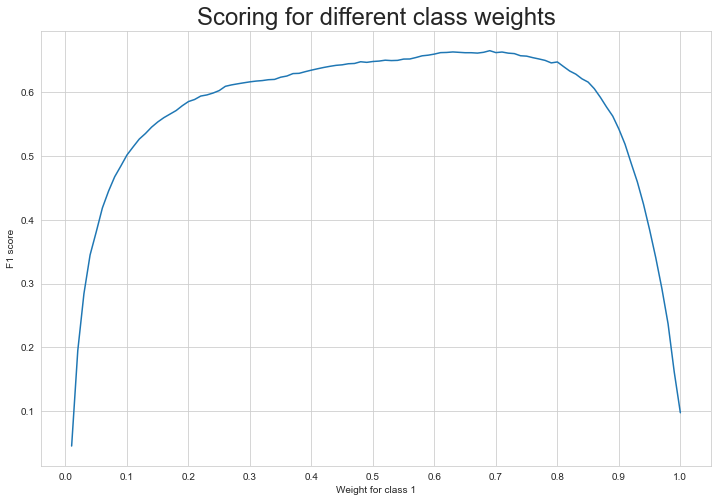

In [339]:
#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch1.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
#In this graph we can see the optimum class weight to achieve good f1 in logistic. Same can be done  in Random Forest

In [70]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,random_state=42,test_size=0.20)
rf1=RandomForestClassifier(class_weight='balanced_subsample',random_state=42)
rf1.fit(xtrain1, ytrain1)
y_pred1=rf1.predict(xtest1)
pred_train1=rf1.predict(xtrain1)
print('confusion_matrix_test','\n',confusion_matrix(ytest1,y_pred1),'\n')
print('classification_report_test','\n',classification_report(ytest1,y_pred1),'\n')
print('confusion_matrix_train','\n',confusion_matrix(ytrain1,pred_train1),'\n')
print('classification_report_train','\n',classification_report(ytrain1,pred_train1),'\n')
print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain1,pred_train1),'\n')
print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest1,y_pred1),'\n')

confusion_matrix_test 
 [[7418   12]
 [ 174  229]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.95      0.57      0.71       403

    accuracy                           0.98      7833
   macro avg       0.96      0.78      0.85      7833
weighted avg       0.98      0.98      0.97      7833
 

confusion_matrix_train 
 [[29733     0]
 [    0  1595]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29733
           1       1.00      1.00      1.00      1595

    accuracy                           1.00     31328
   macro avg       1.00      1.00      1.00     31328
weighted avg       1.00      1.00      1.00     31328
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_score_test 
 roc_auc_score 0.7833115696876388 



In [71]:
y_pred3=rf1.fit(x,y).predict(test_copy3)
sub_5=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_5['buy']=y_pred3
sub_5.to_csv('sub_5.csv',index=False)

In [72]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain1, ytrain1)
#Let’s predict the test results
y_pred4  =  classifier.predict(xtest1)

In [73]:
pred_train4=classifier.predict(xtrain1)
print('confusion_matrix_test','\n',confusion_matrix(ytest1,y_pred4),'\n')
print('classification_report_test','\n',classification_report(ytest1,y_pred4),'\n')
print('confusion_matrix_train','\n',confusion_matrix(ytrain1,pred_train4),'\n')
print('classification_report_train','\n',classification_report(ytrain1,pred_train4),'\n')
print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain1,pred_train4),'\n')
print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest1,y_pred4),'\n')

confusion_matrix_test 
 [[7410   20]
 [ 268  135]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7430
           1       0.87      0.33      0.48       403

    accuracy                           0.96      7833
   macro avg       0.92      0.67      0.73      7833
weighted avg       0.96      0.96      0.96      7833
 

confusion_matrix_train 
 [[29627   106]
 [ 1074   521]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     29733
           1       0.83      0.33      0.47      1595

    accuracy                           0.96     31328
   macro avg       0.90      0.66      0.72     31328
weighted avg       0.96      0.96      0.95     31328
 

roc_auc_score_train 
 roc_auc_score 0.6615403528182432 

roc_auc_score_test 
 roc_auc_score 0.666147901505866 



In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn=KNeighborsClassifier(n_neighbors=3) 
knn.fit(xtrain1,ytrain1)
y_pred5=knn.predict(xtest1)
pred_train5=knn.predict(xtrain1)
print('confusion_matrix_test','\n',confusion_matrix(ytest1,y_pred5),'\n')
print('classification_report_test','\n',classification_report(ytest1,y_pred5),'\n')
print('confusion_matrix_train','\n',confusion_matrix(ytrain1,pred_train5),'\n')
print('classification_report_train','\n',classification_report(ytrain1,pred_train5),'\n')
print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain1,pred_train5),'\n')
print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest1,y_pred5),'\n')

confusion_matrix_test 
 [[7374   56]
 [ 401    2]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7430
           1       0.03      0.00      0.01       403

    accuracy                           0.94      7833
   macro avg       0.49      0.50      0.49      7833
weighted avg       0.90      0.94      0.92      7833
 

confusion_matrix_train 
 [[29683    50]
 [ 1409   186]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     29733
           1       0.79      0.12      0.20      1595

    accuracy                           0.95     31328
   macro avg       0.87      0.56      0.59     31328
weighted avg       0.95      0.95      0.94     31328
 

roc_auc_score_train 
 roc_auc_score 0.5574663934302649 

roc_auc_score_test 
 roc_auc_score 0.49871288352163623 



In [76]:
rf2=RandomForestClassifier(class_weight='balanced',random_state=2)
rf2.fit(xtrain1, ytrain1)
y_pred6=rf2.predict(xtest1)
pred_train6=rf1.predict(xtrain1)
print('confusion_matrix_test','\n',confusion_matrix(ytest1,y_pred6),'\n')
print('classification_report_test','\n',classification_report(ytest1,y_pred6),'\n')
print('confusion_matrix_train','\n',confusion_matrix(ytrain1,pred_train6),'\n')
print('classification_report_train','\n',classification_report(ytrain1,pred_train6),'\n')
print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain1,pred_train6),'\n')
print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest1,y_pred6),'\n')

confusion_matrix_test 
 [[7417   13]
 [ 173  230]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.95      0.57      0.71       403

    accuracy                           0.98      7833
   macro avg       0.96      0.78      0.85      7833
weighted avg       0.98      0.98      0.97      7833
 

confusion_matrix_train 
 [[29733     0]
 [    1  1594]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29733
           1       1.00      1.00      1.00      1595

    accuracy                           1.00     31328
   macro avg       1.00      1.00      1.00     31328
weighted avg       1.00      1.00      1.00     31328
 

roc_auc_score_train 
 roc_auc_score 0.9996865203761756 

roc_auc_score_test 
 roc_auc_score 0.7844849697257112 



In [77]:
y_pred_6=rf2.predict(test_copy3)
sub_6=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_6['buy']=y_pred_6
sub_6.to_csv('sub_6.csv',index=False)

In [78]:
#Lets apply logistic after scaling and transformation

In [79]:
#before transforming lets create copy

In [80]:
train_copy4=train_copy3.copy()
test_copy4=test_copy3.copy()

In [81]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
sc=StandardScaler()
pt=PowerTransformer()
scaled_train=sc.fit_transform(train_copy4.drop('buy',axis=1))
scaled_test=sc.transform(test_copy4)
transformed_train=pt.fit_transform(scaled_train)
transformed_test=pt.transform(scaled_test)

In [82]:
train_copy5=pd.DataFrame(transformed_train,columns=train_copy4.drop('buy',axis=1).columns)
train_copy5['buy']=train_copy4['buy']
test_copy5=pd.DataFrame(transformed_test,columns=test_copy4.columns)

In [83]:
x1=train_copy5.drop('buy',axis=1)
y1=train_copy5['buy']

In [84]:
def lr_output2(x,y):
   
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)
   
    lr=LogisticRegression(penalty='l1',solver='liblinear', class_weight={0: 31 , 1: 0.69})
    lr.fit(xtrain, ytrain)
    y_pred=lr.predict(xtest)
    pred_train=lr.predict(xtrain)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [85]:
lr_output2(x1,y1)

confusion_matrix_test 
 [[9293    1]
 [ 308  189]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      9294
           1       0.99      0.38      0.55       497

    accuracy                           0.97      9791
   macro avg       0.98      0.69      0.77      9791
weighted avg       0.97      0.97      0.96      9791
 

confusion_matrix_train 
 [[27869     0]
 [  983   518]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     27869
           1       1.00      0.35      0.51      1501

    accuracy                           0.97     29370
   macro avg       0.98      0.67      0.75     29370
weighted avg       0.97      0.97      0.96     29370
 

roc_auc_score_train 
 roc_auc_score 0.6725516322451699 

roc_auc_score_test 
 roc_auc_score 0.6900870469210788 



In [86]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,random_state=42,test_size=0.20)
    
rf3=RandomForestClassifier(class_weight='balanced_subsample',random_state=42)
rf3.fit(xtrain1, ytrain1)
y_pred6=rf3.predict(xtest1)
pred_train6=rf3.predict(xtrain1)
print('confusion_matrix_test','\n',confusion_matrix(ytest1,y_pred6),'\n')
print('classification_report_test','\n',classification_report(ytest1,y_pred6),'\n')
print('confusion_matrix_train','\n',confusion_matrix(ytrain1,pred_train6),'\n')
print('classification_report_train','\n',classification_report(ytrain1,pred_train6),'\n')
print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain1,pred_train6),'\n')
print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest1,y_pred6),'\n')

confusion_matrix_test 
 [[7418   12]
 [ 174  229]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.95      0.57      0.71       403

    accuracy                           0.98      7833
   macro avg       0.96      0.78      0.85      7833
weighted avg       0.98      0.98      0.97      7833
 

confusion_matrix_train 
 [[29733     0]
 [    0  1595]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29733
           1       1.00      1.00      1.00      1595

    accuracy                           1.00     31328
   macro avg       1.00      1.00      1.00     31328
weighted avg       1.00      1.00      1.00     31328
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_score_test 
 roc_auc_score 0.7833115696876388 



In [87]:
ypred_7=rf3.predict(test_copy3)
sub_9=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_9['buy']=ypred_7
sub_9.to_csv('sub_9.csv',index=False)

In [88]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,random_state=42,test_size=0.20)
rf3=RandomForestClassifier(class_weight={1:0.70,0:30},random_state=42)
rf3.fit(xtrain1, ytrain1)
y_pred6=rf3.predict(xtest1)
pred_train6=rf3.predict(xtrain1)
print('confusion_matrix_test','\n',confusion_matrix(ytest1,y_pred6),'\n')
print('classification_report_test','\n',classification_report(ytest1,y_pred6),'\n')
print('confusion_matrix_train','\n',confusion_matrix(ytrain1,pred_train6),'\n')
print('classification_report_train','\n',classification_report(ytrain1,pred_train6),'\n')
print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain1,pred_train6),'\n')
print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest1,y_pred6),'\n')

confusion_matrix_test 
 [[7419   11]
 [ 167  236]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.96      0.59      0.73       403

    accuracy                           0.98      7833
   macro avg       0.97      0.79      0.86      7833
weighted avg       0.98      0.98      0.97      7833
 

confusion_matrix_train 
 [[29733     0]
 [    0  1595]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29733
           1       1.00      1.00      1.00      1595

    accuracy                           1.00     31328
   macro avg       1.00      1.00      1.00     31328
weighted avg       1.00      1.00      1.00     31328
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_score_test 
 roc_auc_score 0.7920637279622214 



In [89]:
ypred_8=rf3.predict(test_copy3)
sub_10=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_10['buy']=ypred_8
sub_10.to_csv('sub_10.csv',index=False)

In [90]:
def rf_output(x,y,classweight,n_estimators):
    
    rf=RandomForestClassifier(class_weight=classweight,criterion='entropy',n_estimators=n_estimators,random_state=42)
    output_cross=cross_validate(estimator=rf,X=x,y=y,cv=7,scoring='f1',return_train_score=True)
    output_cross_df=pd.DataFrame({'Train_score':output_cross['train_score'],'Test_score':output_cross['test_score']})
    print('train_mean',output_cross_df['Train_score'].mean())
    print('train_std',output_cross_df['Train_score'].std())
    print('test_mean',output_cross_df['Test_score'].mean())
    print('test_std',output_cross_df['Test_score'].std())
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.20)
    rf.fit(xtrain, ytrain)
    y_pred=rf.predict(xtest)
    pred_train=rf.predict(xtrain)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [91]:
x=train_copy3.drop('buy',axis=1)
y=train['buy']
rf_output(x,y,classweight={1:0.68,0:0.32},n_estimators=100)

train_mean 0.9995826550766983
train_std 0.0002852175768739017
test_mean 0.668984719776333
test_std 0.03275350423742985
confusion_matrix_test 
 [[7417   13]
 [ 171  232]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.95      0.58      0.72       403

    accuracy                           0.98      7833
   macro avg       0.96      0.79      0.85      7833
weighted avg       0.98      0.98      0.97      7833
 

confusion_matrix_train 
 [[29733     0]
 [    0  1595]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29733
           1       1.00      1.00      1.00      1595

    accuracy                           1.00     31328
   macro avg       1.00      1.00      1.00     31328
weighted avg       1.00      1.00      1.00     31328
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_sco

In [92]:
rf4=RandomForestClassifier(class_weight={1:0.68,0:0.32},criterion='entropy')
rf4.fit(x,y)
ypred_9=rf4.predict(test_copy3)


In [93]:
sub_11=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_11['buy']=ypred_9
sub_11.to_csv('sub_11.csv',index=False)

In [337]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
rf = RandomForestClassifier() 

#Setting the range for class weights
weights2 = np.linspace(0.0,0.99,100)

#Creating a dictionary grid for grid search
param_grid2 = {'class_weight': [{0:x, 1:1.0-x} for x in weights2]}

#Fitting grid search to the train data with 5 folds
gridsearch2 = GridSearchCV(estimator= rf, 
                          param_grid=param_grid2,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2)
gridsearch2.fit(x,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.01, 1: 0.99},
                                          {0: 0.02, 1: 0.98},
                                          {0: 0.03, 1: 0.97},
                                          {0: 0.04, 1: 0.96},
                                          {0: 0.05, 1: 0.95},
                                          {0: 0.06, 1: 0.94},
                                          {0: 0.07, 1: 0.9299999999999999},
                                          {0: 0.08, 1: 0.92},
                                          {0: 0.09, 1: 0.91}, {0: 0.1, 1: 0.9},
                                          {0: 0.11, 1: 0.89},
                                          {0: 0.12, 1: 0.88},
                                          {0: 0.13, 1: 0.87},
                                          {0: 0.14, 1: 0.86},
     

Text(0.5, 1.0, 'Scoring for different class weights')

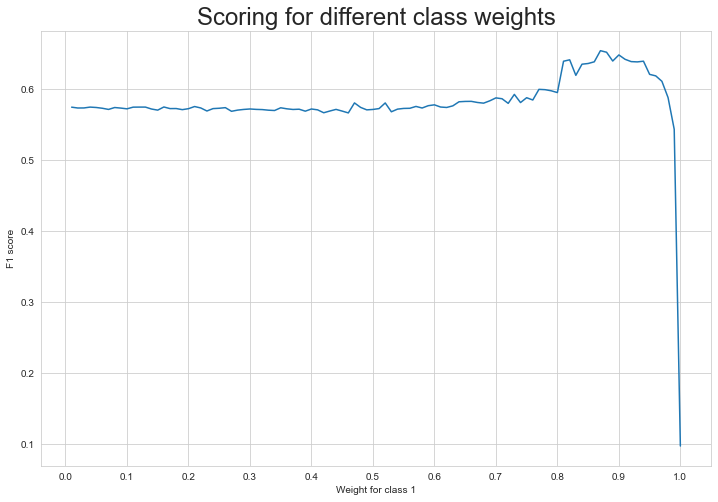

In [489]:
#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({'score': gridsearch2.cv_results_['mean_test_score'],'weight':(1- weights2)})
sns.lineplot(weigh_data['weight'],weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights',fontsize=24)

In [490]:
weigh_data[weigh_data['score']==weigh_data['score'].max()]

,score,weight
13,0.653996,0.87


In [95]:
rf_output(x,y,classweight={1:0.86,0:0.14},n_estimators=100)

train_mean 0.9994574760557057
train_std 0.00031230851358081673
test_mean 0.6659826498239759
test_std 0.03140633985276028
confusion_matrix_test 
 [[7418   12]
 [ 174  229]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.95      0.57      0.71       403

    accuracy                           0.98      7833
   macro avg       0.96      0.78      0.85      7833
weighted avg       0.98      0.98      0.97      7833
 

confusion_matrix_train 
 [[29733     0]
 [    0  1595]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29733
           1       1.00      1.00      1.00      1595

    accuracy                           1.00     31328
   macro avg       1.00      1.00      1.00     31328
weighted avg       1.00      1.00      1.00     31328
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_s

In [96]:
rf5=RandomForestClassifier(class_weight={1:0.84,0:0.16},criterion='entropy')
rf5.fit(x,y)
ypred_10=rf5.predict(test_copy3)

In [97]:
sub_12=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_12['buy']=ypred_10
sub_12.to_csv('sub_12.csv',index=False)

In [98]:
#This is strong transition in itself score reached to 0.757

In [99]:
rf5.feature_importances_

array([0.06695127, 0.04881698, 0.048105  , 0.05626302, 0.01580123,
       0.05675445, 0.00599457, 0.07889851, 0.04159807, 0.01440968,
       0.01043994, 0.02844233, 0.11186935, 0.0011764 , 0.11665566,
       0.00128134, 0.08594639, 0.05188859, 0.07085577, 0.05367691,
       0.03417455, 0.        ])

In [100]:
rf_output(x,y,classweight={1:0.86,0:0.14},n_estimators=150)

train_mean 1.0
train_std 0.0
test_mean 0.6695916892147897
test_std 0.0265069473212744
confusion_matrix_test 
 [[7418   12]
 [ 172  231]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.95      0.57      0.72       403

    accuracy                           0.98      7833
   macro avg       0.96      0.79      0.85      7833
weighted avg       0.98      0.98      0.97      7833
 

confusion_matrix_train 
 [[29733     0]
 [    0  1595]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29733
           1       1.00      1.00      1.00      1595

    accuracy                           1.00     31328
   macro avg       1.00      1.00      1.00     31328
weighted avg       1.00      1.00      1.00     31328
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_score_test 
 roc_auc_score 0.7857929

In [101]:
def rf_output2(x,y,classweight,n_estimators,max_depth):
    
    rf=RandomForestClassifier(class_weight=classweight,criterion='entropy',random_state=42,n_estimators=n_estimators,max_depth=max_depth)
    output_cross=cross_validate(estimator=rf,X=x,y=y,cv=7,scoring='f1',return_train_score=True)
    output_cross_df=pd.DataFrame({'Train_score':output_cross['train_score'],'Test_score':output_cross['test_score']})
    print('train_mean',output_cross_df['Train_score'].mean())
    print('train_std',output_cross_df['Train_score'].std())
    print('test_mean',output_cross_df['Test_score'].mean())
    print('test_std',output_cross_df['Test_score'].std())
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.20)
    rf.fit(xtrain, ytrain)
    y_pred=rf.predict(xtest)
    pred_train=rf.predict(xtrain)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [102]:
rf_output2(x,y,classweight={1:0.86,0:0.14},n_estimators=100,max_depth=12)

train_mean 0.7484588101703242
train_std 0.004075054557234276
test_mean 0.6723016577343872
test_std 0.024138492740649924
confusion_matrix_test 
 [[7364   66]
 [ 141  262]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7430
           1       0.80      0.65      0.72       403

    accuracy                           0.97      7833
   macro avg       0.89      0.82      0.85      7833
weighted avg       0.97      0.97      0.97      7833
 

confusion_matrix_train 
 [[29522   211]
 [  533  1062]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     29733
           1       0.83      0.67      0.74      1595

    accuracy                           0.98     31328
   macro avg       0.91      0.83      0.86     31328
weighted avg       0.97      0.98      0.97     31328
 

roc_auc_score_train 
 roc_auc_score 0.82936711444499

# Manual HyperParameter Tuning 

In [103]:
rf6=RandomForestClassifier(class_weight={1:0.86,0:0.14},criterion='entropy',random_state=42,n_estimators=150,max_depth=12)
rf6.fit(x,y)
ypred_11=rf6.predict(test_copy3)

In [104]:
sub_13=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_13['buy']=ypred_11
sub_13.to_csv('sub_13.csv',index=False)

In [105]:
rf7=RandomForestClassifier(class_weight={1:0.86,0:0.14},criterion='entropy',max_depth=12)
rf7.fit(x,y)
ypred_12=rf7.predict(test_copy3)

In [106]:
sub_16=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_16['buy']=ypred_12
sub_16.to_csv('sub_16.csv',index=False)

In [107]:
rf6=RandomForestClassifier(class_weight={1:0.84,0:0.16},criterion='entropy')
rf6.fit(x,y)
ypred_13=rf6.predict(test_copy3)

In [110]:
sub_17=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_17['buy']=ypred_13
sub_17.to_csv('sub_17.csv',index=False)

In [109]:
#This submission is repeatitive for the highest score

In [111]:
#even after doing same submission it was found that due to random_state it couldnt get better. It was due to luck last time

In [112]:
rf7=RandomForestClassifier(random_state=1,class_weight={1:0.84,0:0.16},criterion='entropy')
rf7.fit(x,y)
ypred_14=rf7.predict(test_copy3)

In [113]:
sub_18=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_18['buy']=ypred_14
sub_18.to_csv('sub_18.csv',index=False)

In [121]:
#74.hd

In [116]:
rf8=RandomForestClassifier(random_state=11,class_weight={1:0.84,0:0.16},criterion='entropy')
rf8.fit(x,y)
ypred_15=rf8.predict(test_copy3)

In [117]:
sub_19=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_19['buy']=ypred_15
sub_19.to_csv('sub_19.csv',index=False)

In [122]:
#72

In [119]:
rf9=RandomForestClassifier(random_state=21,class_weight={1:0.84,0:0.16},criterion='entropy')
rf9.fit(x,y)
ypred_16=rf9.predict(test_copy3)

In [120]:
sub_20=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_20['buy']=ypred_16
sub_20.to_csv('sub_20.csv',index=False)

In [123]:
#74.

In [124]:
rf10=RandomForestClassifier(random_state=31,class_weight={1:0.84,0:0.16},criterion='entropy')
rf10.fit(x,y)
ypred_17=rf10.predict(test_copy3)

In [125]:
sub_21=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_21['buy']=ypred_17
sub_21.to_csv('sub_21.csv',index=False)

In [126]:
#72.8

In [127]:
rf11=RandomForestClassifier(random_state=41,class_weight={1:0.84,0:0.16},criterion='entropy')
rf11.fit(x,y)
ypred_18=rf11.predict(test_copy3)
sub_22=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_22['buy']=ypred_18
sub_22.to_csv('sub_22.csv',index=False)

In [128]:
#73.6

In [129]:
rf12=RandomForestClassifier(random_state=51,class_weight={1:0.84,0:0.16},criterion='entropy')
rf12.fit(x,y)
ypred_19=rf12.predict(test_copy3)
sub_23=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_23['buy']=ypred_19
sub_23.to_csv('sub_23.csv',index=False)

In [130]:
#74.48

In [131]:
rf13=RandomForestClassifier(random_state=61,class_weight={1:0.84,0:0.16},criterion='entropy')
rf13.fit(x,y)
ypred_20=rf13.predict(test_copy3)
sub_24=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_24['buy']=ypred_20
sub_24.to_csv('sub_24.csv',index=False)

In [132]:
#74.78

In [133]:
rf14=RandomForestClassifier(random_state=71,class_weight={1:0.84,0:0.16},criterion='entropy')
rf14.fit(x,y)
ypred_21=rf14.predict(test_copy3)
sub_25=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_25['buy']=ypred_21
sub_25.to_csv('sub_25.csv',index=False)

In [134]:
#72.4

In [135]:
rf15=RandomForestClassifier(random_state=81,class_weight={1:0.84,0:0.16},criterion='entropy')
rf15.fit(x,y)
ypred_22=rf15.predict(test_copy3)
sub_26=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_26['buy']=ypred_22
sub_26.to_csv('sub_26.csv',index=False)

In [136]:
#72.72

In [137]:
rf16=RandomForestClassifier(random_state=91,class_weight={1:0.84,0:0.16},criterion='entropy')
rf16.fit(x,y)
ypred_23=rf16.predict(test_copy3)
sub_27=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_27['buy']=ypred_23
sub_27.to_csv('sub_27.csv',index=False)

In [138]:
#0.73

In [139]:
rf17=RandomForestClassifier(random_state=101,class_weight={1:0.84,0:0.16},criterion='entropy')
rf17.fit(x,y)
ypred_24=rf17.predict(test_copy3)
sub_28=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_28['buy']=ypred_24
sub_28.to_csv('sub_28.csv',index=False)

In [140]:
#73.5

In [141]:
rf18=RandomForestClassifier(random_state=60,class_weight={1:0.84,0:0.16},criterion='entropy')
rf18.fit(x,y)
ypred_25=rf18.predict(test_copy3)
sub_29=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_29['buy']=ypred_25
sub_29.to_csv('sub_29.csv',index=False)

In [142]:
#73.7

In [143]:
rf19=RandomForestClassifier(random_state=59,class_weight={1:0.84,0:0.16},criterion='entropy')
rf19.fit(x,y)
ypred_26=rf19.predict(test_copy3)
sub_30=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_30['buy']=ypred_26
sub_30.to_csv('sub_30.csv',index=False)

In [144]:
#74.5

In [145]:
rf20=RandomForestClassifier(random_state=58,class_weight={1:0.84,0:0.16},criterion='entropy')
rf20.fit(x,y)
ypred_27=rf20.predict(test_copy3)
sub_31=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_31['buy']=ypred_27
sub_31.to_csv('sub_31.csv',index=False)

In [146]:
#72.4

In [147]:
rf21=RandomForestClassifier(random_state=57,class_weight={1:0.84,0:0.16},criterion='entropy')
rf21.fit(x,y)
ypred_28=rf21.predict(test_copy3)
sub_32=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_32['buy']=ypred_28
sub_32.to_csv('sub_32.csv',index=False)

In [148]:
#74.11

In [149]:
rf22=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},criterion='entropy')
rf22.fit(x,y)
ypred_29=rf22.predict(test_copy3)
sub_33=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_33['buy']=ypred_29
sub_33.to_csv('sub_33.csv',index=False)

In [150]:
#76.2

In [240]:
#Highest by now

In [151]:
rf23=RandomForestClassifier(random_state=55,class_weight={1:0.84,0:0.16},criterion='entropy')
rf23.fit(x,y)
ypred_30=rf23.predict(test_copy3)
sub_34=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_34['buy']=ypred_30
sub_34.to_csv('sub_34.csv',index=False)

In [152]:
#72.6

In [154]:
rf24=RandomForestClassifier(random_state=62,class_weight={1:0.84,0:0.16},criterion='entropy')
rf24.fit(x,y)
ypred_31=rf24.predict(test_copy3)
sub_35=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_35['buy']=ypred_31
sub_35.to_csv('sub_35.csv',index=False)

In [155]:
#73.8

In [156]:
rf25=RandomForestClassifier(random_state=63,class_weight={1:0.84,0:0.16},criterion='entropy')
rf25.fit(x,y)
ypred_32=rf25.predict(test_copy3)
sub_36=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_36['buy']=ypred_32
sub_36.to_csv('sub_36.csv',index=False)

In [157]:
#73.25

In [158]:
rf26=RandomForestClassifier(random_state=64,class_weight={1:0.84,0:0.16},criterion='entropy')
rf26.fit(x,y)
ypred_33=rf26.predict(test_copy3)
sub_37=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_37['buy']=ypred_33
sub_37.to_csv('sub_37.csv',index=False)

In [159]:
#73.4

In [162]:
rf27=RandomForestClassifier(random_state=65,class_weight={1:0.84,0:0.16},criterion='entropy')
rf27.fit(x,y)
ypred_34=rf27.predict(test_copy3)
sub_38=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_38['buy']=ypred_34
sub_38.to_csv('sub_38.csv',index=False)

In [163]:
#73.4

In [164]:
rf28=RandomForestClassifier(random_state=66,class_weight={1:0.84,0:0.16},criterion='entropy')
rf28.fit(x,y)
ypred_35=rf28.predict(test_copy3)
sub_39=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_39['buy']=ypred_35
sub_39.to_csv('sub_39.csv',index=False)

In [165]:
#74.7

In [167]:
rf29=RandomForestClassifier(random_state=67,class_weight={1:0.84,0:0.16},criterion='entropy')
rf29.fit(x,y)
ypred_36=rf29.predict(test_copy3)
sub_40=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_40['buy']=ypred_36
sub_40.to_csv('sub_40.csv',index=False)

In [168]:
#74.85

In [169]:
rf30=RandomForestClassifier(random_state=68,class_weight={1:0.84,0:0.16},criterion='entropy')
rf30.fit(x,y)
ypred_37=rf30.predict(test_copy3)
sub_41=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_41['buy']=ypred_37
sub_41.to_csv('sub_41.csv',index=False)

In [170]:
#73.3

In [171]:
rf31=RandomForestClassifier(random_state=69,class_weight={1:0.84,0:0.16},criterion='entropy')
rf31.fit(x,y)
ypred_38=rf31.predict(test_copy3)
sub_42=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_42['buy']=ypred_38
sub_42.to_csv('sub_42.csv',index=False)

In [172]:
#72.9

In [174]:
rf32=RandomForestClassifier(random_state=70,class_weight={1:0.84,0:0.16},criterion='entropy')
rf32.fit(x,y)
ypred_39=rf32.predict(test_copy3)
sub_43=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_43['buy']=ypred_39
sub_43.to_csv('sub_43.csv',index=False)

In [175]:
#74

In [176]:
rf33=RandomForestClassifier(random_state=72,class_weight={1:0.84,0:0.16},criterion='entropy')
rf33.fit(x,y)
ypred_40=rf33.predict(test_copy3)
sub_44=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_44['buy']=ypred_40
sub_44.to_csv('sub_44.csv',index=False)

In [177]:
#73.3

In [178]:
rf34=RandomForestClassifier(random_state=73,class_weight={1:0.84,0:0.16},criterion='entropy')
rf34.fit(x,y)
ypred_41=rf34.predict(test_copy3)
sub_45=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_45['buy']=ypred_41
sub_45.to_csv('sub_45.csv',index=False)

In [179]:
#73.3

In [181]:
rf35=RandomForestClassifier(random_state=74,class_weight={1:0.84,0:0.16},criterion='entropy')
rf35.fit(x,y)
ypred_42=rf35.predict(test_copy3)
sub_46=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_46['buy']=ypred_42
sub_46.to_csv('sub_46.csv',index=False)

In [182]:
#73.9

In [183]:
rf36=RandomForestClassifier(random_state=75,class_weight={1:0.84,0:0.16},criterion='entropy')
rf36.fit(x,y)
ypred_43=rf36.predict(test_copy3)
sub_47=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_47['buy']=ypred_43
sub_47.to_csv('sub_47.csv',index=False)

In [184]:
#73

In [185]:
rf37=RandomForestClassifier(random_state=76,class_weight={1:0.84,0:0.16},criterion='entropy')
rf37.fit(x,y)
ypred_44=rf37.predict(test_copy3)
sub_48=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_48['buy']=ypred_44
sub_48.to_csv('sub_48.csv',index=False)

In [186]:
#75.27

In [187]:
rf38=RandomForestClassifier(random_state=77,class_weight={1:0.84,0:0.16},criterion='entropy')
rf38.fit(x,y)
ypred_45=rf38.predict(test_copy3)
sub_49=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_49['buy']=ypred_45
sub_49.to_csv('sub_49.csv',index=False)

In [188]:
#72

In [189]:
rf39=RandomForestClassifier(random_state=78,class_weight={1:0.84,0:0.16},criterion='entropy')
rf39.fit(x,y)
ypred_46=rf39.predict(test_copy3)
sub_50=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_50['buy']=ypred_46
sub_50.to_csv('sub_50.csv',index=False)

In [190]:
#74.4

In [193]:
rf40=RandomForestClassifier(random_state=79,class_weight={1:0.84,0:0.16},criterion='entropy')
rf40.fit(x,y)
ypred_47=rf40.predict(test_copy3)
sub_51=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_51['buy']=ypred_47
sub_51.to_csv('sub_51.csv',index=False)

In [192]:
#74.4

In [194]:
rf41=RandomForestClassifier(random_state=80,class_weight={1:0.84,0:0.16},criterion='entropy')
rf41.fit(x,y)
ypred_48=rf41.predict(test_copy3)
sub_52=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_52['buy']=ypred_48
sub_52.to_csv('sub_52.csv',index=False)

In [195]:
#72.5

In [196]:
rf42=RandomForestClassifier(random_state=180,class_weight={1:0.84,0:0.16},criterion='entropy')
rf42.fit(x,y)
ypred_49=rf42.predict(test_copy3)
sub_53=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_53['buy']=ypred_49
sub_53.to_csv('sub_53.csv',index=False)

In [197]:
#74.13

In [198]:
rf43=RandomForestClassifier(random_state=181,class_weight={1:0.84,0:0.16},criterion='entropy')
rf43.fit(x,y)
ypred_50=rf43.predict(test_copy3)
sub_54=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_54['buy']=ypred_50
sub_54.to_csv('sub_54.csv',index=False)

In [199]:
#72.72

In [200]:
rf44=RandomForestClassifier(random_state=182,class_weight={1:0.84,0:0.16},criterion='entropy')
rf44.fit(x,y)
ypred_51=rf44.predict(test_copy3)
sub_55=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_55['buy']=ypred_51
sub_55.to_csv('sub_55.csv',index=False)

In [201]:
#72.8

In [202]:
rf45=RandomForestClassifier(random_state=183,class_weight={1:0.84,0:0.16},criterion='entropy')
rf45.fit(x,y)
ypred_52=rf45.predict(test_copy3)
sub_56=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_56['buy']=ypred_52
sub_56.to_csv('sub_56.csv',index=False)

In [203]:
#73

In [204]:
rf46=RandomForestClassifier(random_state=184,class_weight={1:0.84,0:0.16},criterion='entropy')
rf46.fit(x,y)
ypred_53=rf46.predict(test_copy3)
sub_57=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_57['buy']=ypred_53
sub_57.to_csv('sub_57.csv',index=False)

In [205]:
#74.26

In [206]:
rf47=RandomForestClassifier(random_state=185,class_weight={1:0.84,0:0.16},criterion='entropy')
rf47.fit(x,y)
ypred_54=rf47.predict(test_copy3)
sub_58=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_58['buy']=ypred_54
sub_58.to_csv('sub_58.csv',index=False)

In [207]:
#71.6

In [208]:
rf48=RandomForestClassifier(random_state=186,class_weight={1:0.84,0:0.16},criterion='entropy')
rf48.fit(x,y)
ypred_55=rf48.predict(test_copy3)
sub_59=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_59['buy']=ypred_55
sub_59.to_csv('sub_59.csv',index=False)

In [209]:
#72.8

In [210]:
rf49=RandomForestClassifier(random_state=187,class_weight={1:0.84,0:0.16},criterion='entropy')
rf49.fit(x,y)
ypred_56=rf49.predict(test_copy3)
sub_60=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_60['buy']=ypred_56
sub_60.to_csv('sub_60.csv',index=False)

In [211]:
#73.15

In [212]:
rf50=RandomForestClassifier(random_state=188,class_weight={1:0.84,0:0.16},criterion='entropy')
rf50.fit(x,y)
ypred_57=rf50.predict(test_copy3)
sub_61=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_61['buy']=ypred_57
sub_61.to_csv('sub_61.csv',index=False)

In [213]:
#73.05

In [215]:
rf51=RandomForestClassifier(random_state=189,class_weight={1:0.84,0:0.16},criterion='entropy')
rf51.fit(x,y)
ypred_58=rf51.predict(test_copy3)
sub_62=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_62['buy']=ypred_58
sub_62.to_csv('sub_62.csv',index=False)

In [216]:
#73.15

In [218]:
rf52=RandomForestClassifier(random_state=190,class_weight={1:0.84,0:0.16},criterion='entropy')
rf52.fit(x,y)
ypred_59=rf52.predict(test_copy3)
sub_63=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_63['buy']=ypred_59
sub_63.to_csv('sub_63.csv',index=False)

In [219]:
#73.68

In [220]:
rf53=RandomForestClassifier(random_state=191,class_weight={1:0.84,0:0.16},criterion='entropy')
rf53.fit(x,y)
ypred_60=rf53.predict(test_copy3)
sub_64=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_64['buy']=ypred_60
sub_64.to_csv('sub_64.csv',index=False)

In [221]:
#73.18

In [222]:
rf54=RandomForestClassifier(random_state=192,class_weight={1:0.84,0:0.16},criterion='entropy')
rf54.fit(x,y)
ypred_61=rf54.predict(test_copy3)
sub_65=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_65['buy']=ypred_61
sub_65.to_csv('sub_65.csv',index=False)

In [223]:
#73.96

In [224]:
rf55=RandomForestClassifier(random_state=193,class_weight={1:0.84,0:0.16},criterion='entropy')
rf55.fit(x,y)
ypred_62=rf55.predict(test_copy3)
sub_66=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_66['buy']=ypred_62
sub_66.to_csv('sub_66.csv',index=False)

In [225]:
#72.8

In [226]:
rf56=RandomForestClassifier(random_state=194,class_weight={1:0.84,0:0.16},criterion='entropy')
rf56.fit(x,y)
ypred_63=rf56.predict(test_copy3)
sub_67=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_67['buy']=ypred_63
sub_67.to_csv('sub_67.csv',index=False)

In [227]:
#74.7

In [228]:
rf57=RandomForestClassifier(random_state=195,class_weight={1:0.84,0:0.16},criterion='entropy')
rf57.fit(x,y)
ypred_64=rf57.predict(test_copy3)
sub_68=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_68['buy']=ypred_64
sub_68.to_csv('sub_68.csv',index=False)

In [229]:
#74.41

In [230]:
rf58=RandomForestClassifier(random_state=196,class_weight={1:0.84,0:0.16},criterion='entropy')
rf58.fit(x,y)
ypred_65=rf58.predict(test_copy3)
sub_69=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_69['buy']=ypred_65
sub_69.to_csv('sub_69.csv',index=False)

In [231]:
#72.8

In [232]:
rf59=RandomForestClassifier(random_state=197,class_weight={1:0.84,0:0.16},criterion='entropy')
rf59.fit(x,y)
ypred_66=rf59.predict(test_copy3)
sub_70=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_70['buy']=ypred_66
sub_70.to_csv('sub_70.csv',index=False)

In [233]:
#72.8

In [234]:
rf60=RandomForestClassifier(random_state=198,class_weight={1:0.84,0:0.16},criterion='entropy')
rf60.fit(x,y)
ypred_67=rf60.predict(test_copy3)
sub_71=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_71['buy']=ypred_67
sub_71.to_csv('sub_71.csv',index=False)

In [235]:
#74

In [236]:
rf61=RandomForestClassifier(random_state=199,class_weight={1:0.84,0:0.16},criterion='entropy')
rf61.fit(x,y)
ypred_68=rf61.predict(test_copy3)
sub_72=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_72['buy']=ypred_68
sub_72.to_csv('sub_72.csv',index=False)

In [237]:
#73.68

In [238]:
rf62=RandomForestClassifier(random_state=200,class_weight={1:0.84,0:0.16},criterion='entropy')
rf62.fit(x,y)
ypred_69=rf62.predict(test_copy3)
sub_73=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_73['buy']=ypred_69
sub_73.to_csv('sub_73.csv',index=False)

In [239]:
#73.4

In [385]:
def rf_output_new(x,y,classweight,n_estimators,max_depth):
    
    rf=RandomForestClassifier(class_weight=classweight,criterion='entropy',random_state=56,n_estimators=n_estimators,max_depth=max_depth)
    output_cross=cross_validate(estimator=rf,X=x,y=y,cv=7,scoring='f1',return_train_score=True)
    output_cross_df=pd.DataFrame({'Train_score':output_cross['train_score'],'Test_score':output_cross['test_score']})
    print('train_mean',output_cross_df['Train_score'].mean())
    print('train_std',output_cross_df['Train_score'].std())
    print('test_mean',output_cross_df['Test_score'].mean())
    print('test_std',output_cross_df['Test_score'].std())
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=56,test_size=0.20)
    rf.fit(xtrain, ytrain)
    y_pred=rf.predict(xtest)
    pred_train=rf.predict(xtrain)
    print('confusion_matrix_test','\n',confusion_matrix(ytest,y_pred),'\n')
    print('classification_report_test','\n',classification_report(ytest,y_pred),'\n')
    print('confusion_matrix_train','\n',confusion_matrix(ytrain,pred_train),'\n')
    print('classification_report_train','\n',classification_report(ytrain,pred_train),'\n')
    print('roc_auc_score_train','\n','roc_auc_score',roc_auc_score(ytrain,pred_train),'\n')
    print('roc_auc_score_test','\n','roc_auc_score',roc_auc_score(ytest,y_pred),'\n')

In [386]:
rf_output_new(x,y,classweight={1:0.84,0:0.16},n_estimators=100,max_depth=16)

train_mean 0.8543238934348355
train_std 0.005117963947958689
test_mean 0.6750865389697015
test_std 0.018932811160464254
confusion_matrix_test 
 [[7405   24]
 [ 212  192]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7429
           1       0.89      0.48      0.62       404

    accuracy                           0.97      7833
   macro avg       0.93      0.74      0.80      7833
weighted avg       0.97      0.97      0.97      7833
 

confusion_matrix_train 
 [[29727     7]
 [  358  1236]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29734
           1       0.99      0.78      0.87      1594

    accuracy                           0.99     31328
   macro avg       0.99      0.89      0.93     31328
weighted avg       0.99      0.99      0.99     31328
 

roc_auc_score_train 
 roc_auc_score 0.88758617922070

In [259]:
#lets create a new model with max_depth=16

In [260]:
rf_new=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=16,criterion='entropy')
rf_new.fit(x,y)
ypred_70=rf_new.predict(test_copy3)
sub_74=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_74['buy']=ypred_70
sub_74.to_csv('sub_74.csv',index=False)

In [261]:
#72.77

In [262]:
rf_new2=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},criterion='entropy')
rf_new2.fit(x,y)
ypred_71=rf_new2.predict(test_copy3)
sub_75=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_75['buy']=ypred_71
sub_75.to_csv('sub_75.csv',index=False)

In [263]:
#76.27

In [264]:
rf_new3=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=10,criterion='entropy')
rf_new3.fit(x,y)
ypred_72=rf_new3.predict(test_copy3)
sub_76=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_76['buy']=ypred_72
sub_76.to_csv('sub_76.csv',index=False)

In [265]:
#70.9

In [266]:
rf_new4=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=12,criterion='entropy')
rf_new4.fit(x,y)
ypred_73=rf_new4.predict(test_copy3)
sub_77=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_77['buy']=ypred_73
sub_77.to_csv('sub_77.csv',index=False)

In [267]:
#71.9

In [268]:
rf_new5=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=18,criterion='entropy')
rf_new5.fit(x,y)
ypred_74=rf_new5.predict(test_copy3)
sub_78=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_78['buy']=ypred_74
sub_78.to_csv('sub_78.csv',index=False)

In [269]:
#72

In [270]:
rf_new6=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=24,criterion='entropy')
rf_new6.fit(x,y)
ypred_75=rf_new6.predict(test_copy3)
sub_79=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_79['buy']=ypred_75
sub_79.to_csv('sub_79.csv',index=False)

In [271]:
#72

In [272]:
rf_new7=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=30,criterion='entropy')
rf_new7.fit(x,y)
ypred_76=rf_new7.predict(test_copy3)
sub_80=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_80['buy']=ypred_76
sub_80.to_csv('sub_80.csv',index=False)

In [273]:
#74.8

In [274]:
rf_new8=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=35,criterion='entropy')
rf_new8.fit(x,y)
ypred_77=rf_new8.predict(test_copy3)
sub_81=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_81['buy']=ypred_77
sub_81.to_csv('sub_81.csv',index=False)

In [275]:
#75

In [276]:
rf_new9=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=40,criterion='entropy')
rf_new9.fit(x,y)
ypred_78=rf_new9.predict(test_copy3)
sub_82=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_82['buy']=ypred_78
sub_82.to_csv('sub_82.csv',index=False)

In [279]:
#76.48
#Highest uptil now

In [281]:
rf_new10=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=45,criterion='entropy')
rf_new10.fit(x,y)
ypred_79=rf_new10.predict(test_copy3)
sub_83=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_83['buy']=ypred_79
sub_83.to_csv('sub_83.csv',index=False)

In [282]:
#76.2

In [283]:
rf_new11=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=50,criterion='entropy')
rf_new11.fit(x,y)
ypred_80=rf_new11.predict(test_copy3)
sub_84=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_84['buy']=ypred_80
sub_84.to_csv('sub_84.csv',index=False)

In [284]:
#76.27

In [285]:
rf_new12=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=55,criterion='entropy')
rf_new12.fit(x,y)
ypred_81=rf_new12.predict(test_copy3)
sub_85=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_85['buy']=ypred_81
sub_85.to_csv('sub_85.csv',index=False)

In [286]:
#76.27

In [287]:
#stagnating at 76.27

In [288]:
rf_new13=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=38,criterion='entropy')
rf_new13.fit(x,y)
ypred_82=rf_new13.predict(test_copy3)
sub_86=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_86['buy']=ypred_82
sub_86.to_csv('sub_86.csv',index=False)

In [289]:
#76.05

In [290]:
rf_new14=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,criterion='entropy')
rf_new14.fit(x,y)
ypred_83=rf_new14.predict(test_copy3)
sub_87=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_87['buy']=ypred_83
sub_87.to_csv('sub_87.csv',index=False)

In [291]:
#76.4872

In [295]:
#highest till now

In [292]:
rf_new15=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=41,criterion='entropy')
rf_new15.fit(x,y)
ypred_84=rf_new15.predict(test_copy3)
sub_88=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_88['buy']=ypred_84
sub_88.to_csv('sub_88.csv',index=False)

In [293]:
#76.27

In [294]:
rf_new16=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=42,criterion='entropy')
rf_new16.fit(x,y)
ypred_85=rf_new16.predict(test_copy3)
sub_89=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_89['buy']=ypred_85
sub_89.to_csv('sub_89.csv',index=False)

In [296]:
#76.27

In [297]:
#lets optimize n_estimators now

In [298]:
rf_new17=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=120,criterion='entropy')
rf_new17.fit(x,y)
ypred_86=rf_new17.predict(test_copy3)
sub_90=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_90['buy']=ypred_86
sub_90.to_csv('sub_90.csv',index=False)

In [299]:
#0.76

In [300]:
rf_new18=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=110,criterion='entropy')
rf_new18.fit(x,y)
ypred_87=rf_new18.predict(test_copy3)
sub_91=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_91['buy']=ypred_87
sub_91.to_csv('sub_91.csv',index=False)

In [301]:
#0.76.4872

In [302]:
rf_new19=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=90,criterion='entropy')
rf_new19.fit(x,y)
ypred_88=rf_new19.predict(test_copy3)
sub_92=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_92['buy']=ypred_88
sub_92.to_csv('sub_92.csv',index=False)

In [303]:
#0.75

In [304]:
rf_new20=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=95,criterion='entropy')
rf_new20.fit(x,y)
ypred_89=rf_new20.predict(test_copy3)
sub_93=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_93['buy']=ypred_89
sub_93.to_csv('sub_93.csv',index=False)

In [305]:
#0.964

In [306]:
rf_new21=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=98,criterion='entropy')
rf_new21.fit(x,y)
ypred_90=rf_new21.predict(test_copy3)
sub_94=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_94['buy']=ypred_90
sub_94.to_csv('sub_94.csv',index=False)

In [307]:
#0.7578

In [308]:
rf_new22=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=99,criterion='entropy')
rf_new22.fit(x,y)
ypred_90=rf_new22.predict(test_copy3)
sub_95=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_95['buy']=ypred_90
sub_95.to_csv('sub_95.csv',index=False)

In [309]:
#0.76.4872

In [310]:
rf_new23=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=100,criterion='entropy')
rf_new23.fit(x,y)
ypred_91=rf_new23.predict(test_copy3)
sub_96=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_96['buy']=ypred_91
sub_96.to_csv('sub_96.csv',index=False)

In [311]:
#0.76.4872

In [312]:
rf_new24=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=102,criterion='entropy')
rf_new24.fit(x,y)
ypred_92=rf_new24.predict(test_copy3)
sub_97=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_97['buy']=ypred_92
sub_97.to_csv('sub_97.csv',index=False)

In [313]:
#0.7613

In [314]:
rf_new25=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=104,criterion='entropy')
rf_new25.fit(x,y)
ypred_93=rf_new25.predict(test_copy3)
sub_98=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_98['buy']=ypred_93
sub_98.to_csv('sub_98.csv',index=False)

In [315]:
#75.92

In [316]:
rf_new26=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=106,criterion='entropy')
rf_new26.fit(x,y)
ypred_94=rf_new26.predict(test_copy3)
sub_99=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_99['buy']=ypred_94
sub_99.to_csv('sub_99.csv',index=False)

In [317]:
#0.7613

In [319]:
rf_new27=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=108,criterion='entropy')
rf_new27.fit(x,y)
ypred_95=rf_new27.predict(test_copy3)
sub_100=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_100['buy']=ypred_95
sub_100.to_csv('sub_100.csv',index=False)

In [320]:
#75.78

In [322]:
rf_new28=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=110,criterion='entropy')
rf_new28.fit(x,y)
ypred_96=rf_new28.predict(test_copy3)
sub_101=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_101['buy']=ypred_96
sub_101.to_csv('sub_101.csv',index=False)

In [323]:
#0.7648

In [324]:
rf_new29=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=109,criterion='entropy')
rf_new29.fit(x,y)
ypred_97=rf_new29.predict(test_copy3)
sub_102=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_102['buy']=ypred_97
sub_102.to_csv('sub_102.csv',index=False)

In [325]:
#0.7648

# Final-Model Random Forest Classifier 

In [326]:
rf_new30=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=111,criterion='entropy')
rf_new30.fit(x,y)
ypred_98=rf_new30.predict(test_copy3)
sub_103=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_103['buy']=ypred_98
sub_103.to_csv('sub_103.csv',index=False)

In [327]:
#76.9 Highest uptill now

In [328]:
rf_new31=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=112,criterion='entropy')
rf_new31.fit(x,y)
ypred_99=rf_new31.predict(test_copy3)
sub_104=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_104['buy']=ypred_99
sub_104.to_csv('sub_104.csv',index=False)

In [330]:
#76.4872 

In [331]:
rf_new32=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=113,criterion='entropy')
rf_new32.fit(x,y)
ypred_101=rf_new32.predict(test_copy3)
sub_105=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_105['buy']=ypred_101
sub_105.to_csv('sub_105.csv',index=False)

In [332]:
#76.4872 

In [333]:
rf_new33=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=115,criterion='entropy')
rf_new33.fit(x,y)
ypred_102=rf_new33.predict(test_copy3)
sub_106=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_106['buy']=ypred_102
sub_106.to_csv('sub_106.csv',index=False)

In [334]:
#76.4872 

In [340]:
rf_output_new(x,y,classweight={1:0.84,0:0.16},n_estimators=115,max_depth=39)

train_mean 0.999749519913167
train_std 0.0003124035557129114
test_mean 0.6672242351997214
test_std 0.033192558746885384
confusion_matrix_test 
 [[7419   10]
 [ 225  179]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7429
           1       0.95      0.44      0.60       404

    accuracy                           0.97      7833
   macro avg       0.96      0.72      0.79      7833
weighted avg       0.97      0.97      0.96      7833
 

confusion_matrix_train 
 [[29734     0]
 [    0  1594]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29734
           1       1.00      1.00      1.00      1594

    accuracy                           1.00     31328
   macro avg       1.00      1.00      1.00     31328
weighted avg       1.00      1.00      1.00     31328
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_sc

In [341]:
train_copy3.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,signup_day,signup_year,signup_month,created_at_day,created_at_month,created_at_year,buy
0,1.0,1.0,2.0,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.0,2020.0,9.0,1.0,1.0,2021.0,0
1,2.0,2.0,1.0,2.00000,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.0,2020.0,9.0,1.0,1.0,2021.0,0
2,3.0,9.0,3.0,3.00000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,2021.0,8.0,1.0,1.0,2021.0,0
3,4.0,6.0,7.0,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,2017.0,10.0,1.0,1.0,2021.0,0
4,5.0,4.0,6.0,2.23784,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,8.0,2020.0,6.0,1.0,1.0,2021.0,0


# Feature Extraction 

In [352]:
train_copy6=train_copy3.copy()
test_copy6=test_copy3.copy()

In [353]:
train_copy6.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,signup_day,signup_year,signup_month,created_at_day,created_at_month,created_at_year
0,1.0,1.0,2.0,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.0,2020.0,9.0,1.0,1.0,2021.0
1,2.0,2.0,1.0,2.00000,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19.0,2020.0,9.0,1.0,1.0,2021.0
2,3.0,9.0,3.0,3.00000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,2021.0,8.0,1.0,1.0,2021.0
3,4.0,6.0,7.0,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,2017.0,10.0,1.0,1.0,2021.0
4,5.0,4.0,6.0,2.23784,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,8.0,2020.0,6.0,1.0,1.0,2021.0


In [355]:
train_copy6['campaign_total']=train_copy3['campaign_var_1']+train_copy3['campaign_var_2']

In [354]:
test_copy6['campaign_total']=test_copy3['campaign_var_1']+test_copy3['campaign_var_2']

In [357]:
x_new=train_copy6
y_new=train['buy']

In [358]:
rf_output_new(x_new,y_new,classweight={1:0.84,0:0.16},n_estimators=115,max_depth=39)

train_mean 0.999749519913167
train_std 0.0003124035557129114
test_mean 0.671344030933989
test_std 0.02659560634942588
confusion_matrix_test 
 [[7420    9]
 [ 228  176]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7429
           1       0.95      0.44      0.60       404

    accuracy                           0.97      7833
   macro avg       0.96      0.72      0.79      7833
weighted avg       0.97      0.97      0.96      7833
 

confusion_matrix_train 
 [[29734     0]
 [    0  1594]] 

classification_report_train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29734
           1       1.00      1.00      1.00      1594

    accuracy                           1.00     31328
   macro avg       1.00      1.00      1.00     31328
weighted avg       1.00      1.00      1.00     31328
 

roc_auc_score_train 
 roc_auc_score 1.0 

roc_auc_scor

In [360]:
#lets submit this

In [361]:
rf_new34=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=39,n_estimators=115,criterion='entropy')
rf_new34.fit(x_new,y_new)
ypred_103=rf_new34.predict(test_copy6)
sub_107=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_107['buy']=ypred_103
sub_107.to_csv('sub_107.csv',index=False)

In [365]:
rf_new34.feature_importances_

array([0.06370271, 0.04091658, 0.04116147, 0.05324899, 0.01531   ,
       0.05672695, 0.00554854, 0.08187516, 0.04040205, 0.01315158,
       0.00969648, 0.02848854, 0.11006437, 0.00108798, 0.1114154 ,
       0.00113739, 0.07758001, 0.05421003, 0.06855871, 0.04912093,
       0.03254845, 0.        , 0.04404768])

In [371]:
importance=pd.DataFrame(rf_new34.feature_importances_*100,index=x_new.columns,columns=['imp'])

In [376]:
importance.sort_values(by='imp',ascending=False)

,imp
user_activity_var_11,11.141540
user_activity_var_9,11.006437
user_activity_var_4,8.187516
signup_day,7.758001
signup_month,6.855871
id,6.370271
user_activity_var_2,5.672695
signup_year,5.421003
products_purchased,5.324899
created_at_day,4.912093


In [362]:
#score 72.4

In [391]:
#This is base model before any feature extraction implementation

In [387]:
rf_output_new(x,y,classweight={1:0.84,0:0.16},n_estimators=100,max_depth=16)

train_mean 0.8543238934348355
train_std 0.005117963947958689
test_mean 0.6750865389697015
test_std 0.018932811160464254
confusion_matrix_test 
 [[7405   24]
 [ 212  192]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7429
           1       0.89      0.48      0.62       404

    accuracy                           0.97      7833
   macro avg       0.93      0.74      0.80      7833
weighted avg       0.97      0.97      0.97      7833
 

confusion_matrix_train 
 [[29727     7]
 [  358  1236]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29734
           1       0.99      0.78      0.87      1594

    accuracy                           0.99     31328
   macro avg       0.99      0.89      0.93     31328
weighted avg       0.99      0.99      0.99     31328
 

roc_auc_score_train 
 roc_auc_score 0.88758617922070

In [389]:
rf_output_new(x_new,y_new,classweight={1:0.84,0:0.16},n_estimators=100,max_depth=16)

train_mean 0.8564632794758735
train_std 0.009528141659474023
test_mean 0.669567231300498
test_std 0.023455422012037343
confusion_matrix_test 
 [[7407   22]
 [ 218  186]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7429
           1       0.89      0.46      0.61       404

    accuracy                           0.97      7833
   macro avg       0.93      0.73      0.80      7833
weighted avg       0.97      0.97      0.96      7833
 

confusion_matrix_train 
 [[29728     6]
 [  357  1237]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29734
           1       1.00      0.78      0.87      1594

    accuracy                           0.99     31328
   macro avg       0.99      0.89      0.93     31328
weighted avg       0.99      0.99      0.99     31328
 

roc_auc_score_train 
 roc_auc_score 0.887916671273244

In [392]:
#scores has dropped so lets not do this

In [395]:
rf_new35=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=16,n_estimators=100,criterion='entropy')
rf_new35.fit(x_new,y_new)
ypred_104=rf_new35.predict(test_copy6)
sub_108=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_108['buy']=ypred_104
sub_108.to_csv('sub_108.csv',index=False)

In [396]:
#gives a score of 75.33

In [400]:
#lets check score on original before feature engg.

In [399]:
rf_new36=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=16,n_estimators=100,criterion='entropy')
rf_new36.fit(x,y)
ypred_105=rf_new36.predict(test_copy3)
sub_109=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_109['buy']=ypred_105
sub_109.to_csv('sub_109.csv',index=False)

In [401]:
#72.77

In [402]:
#lets extract more features

In [403]:
train_temp=train.copy()
test_temp=test.copy()

In [404]:
train_temp.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [405]:
train_copy6.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,signup_day,signup_year,signup_month,created_at_day,created_at_month,created_at_year,campaign_total
0,1.0,1.0,2.0,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.0,2020.0,9.0,1.0,1.0,2021.0,3.0
1,2.0,2.0,1.0,2.00000,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.0,2020.0,9.0,1.0,1.0,2021.0,3.0
2,3.0,9.0,3.0,3.00000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,2021.0,8.0,1.0,1.0,2021.0,12.0
3,4.0,6.0,7.0,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,2017.0,10.0,1.0,1.0,2021.0,13.0
4,5.0,4.0,6.0,2.23784,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,8.0,2020.0,6.0,1.0,1.0,2021.0,10.0


In [419]:
print(list2)

[2020, 2021, 2017, 2019, 2018, 2022, 2016, 2015]


In [423]:
train_copy7['date_diff']=np.abs(((train_copy7['signup_year'].astype('int')-1)*(train_copy7['signup_month'].astype('int')-1)+train_copy7['signup_day'].astype('int'))-((train_copy7['created_at_year'].astype('int')-1)*(train_copy7['created_at_month'].astype('int')-1)+train_copy7['created_at_day'].astype('int')))

In [424]:
train_copy7['date_diff'].unique()

array([16175, 16170, 14150, ..., 12154, 12157, 16190])

In [430]:
train_copy7['date_diff2']=np.abs(((train_copy7['signup_year'].astype('int')-1)*12+(train_copy7['signup_month'].astype('int')-1)*30+train_copy7['signup_day'].astype('int'))-(2020*12+(train_copy7['created_at_month'].astype('int')-1)*30+train_copy7['created_at_day'].astype('int')))

In [513]:
test_copy7['date_diff2']=np.abs(((test_copy7['signup_year'].astype('int')-1)*12+(test_copy7['signup_month'].astype('int')-1)*30+test_copy7['signup_day'].astype('int'))-(2021*12+(test_copy7['created_at_month'].astype('int')-1)*30+test_copy7['created_at_day'].astype('int')))

In [447]:
train_copy7['date_diff2'].unique()

array([251, 246, 220, 225, 145, 157, 179, 329, 134, 289,  18, 140, 314,
        21,  98,  68, 288, 233, 279, 201, 139,  34, 127,   0,  95, 232,
       200, 302,  44, 202, 175, 164, 102, 269, 170, 197, 113, 250, 252,
       119, 290,  48,  90, 312, 105, 143,  38, 163, 184, 254, 309, 177,
       138, 116, 261, 196, 159,  72, 222, 173, 141, 253,  52, 270, 151,
       323, 336,  64, 156, 223, 194, 161, 174, 268, 150,   1, 219, 142,
        27, 204,  42, 137,  24, 135, 315,  93, 153, 149, 243, 283,  60,
        92,  10, 132, 295,  58,  15, 147, 130, 107, 191,  32, 168, 136,
        13,  12, 256, 265,  51, 160, 317,   2,   6, 189, 125, 313, 181,
        57,   3,  63, 296,  40, 272,   7, 267, 305, 276, 235,  88,  31,
       333, 115, 298, 183, 311, 321, 304, 186, 209,  82, 172, 286, 124,
       229, 241,  45, 300, 110, 162, 133,  46,  65, 274, 273, 114, 154,
       118, 301,  41,  61, 280, 230, 100, 188,  79, 278, 249,  33,  86,
       227,  55, 218, 335,  83, 131, 310, 224,  28, 171, 221, 18

In [5]:
#Difference is created between sing up and created at making new Feature as date diff

In [501]:
train_copy7.columns

Index(['id', 'campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'signup_day', 'signup_year', 'signup_month', 'created_at_day',
       'created_at_month', 'created_at_year', 'campaign_total', 'date_diff',
       'date_diff2'],
      dtype='object')

In [514]:
train_copy8=train_copy7.drop('date_diff',axis=1)
test_copy8=test_copy7.drop('date_diff3',axis=1)

In [506]:
train_copy8['buy']=train['buy']

In [507]:
x_new2=train_copy8.drop('buy',axis=1)
y_new2=train_copy8['buy']

In [508]:
rf_output_new(x_new2,y_new2,classweight={1:0.84,0:0.16},n_estimators=100,max_depth=16)

train_mean 0.8620699722595327
train_std 0.0069036913830681935
test_mean 0.6656327557803098
test_std 0.027776330906923413
confusion_matrix_test 
 [[7408   21]
 [ 220  184]] 

classification_report_test 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7429
           1       0.90      0.46      0.60       404

    accuracy                           0.97      7833
   macro avg       0.93      0.73      0.79      7833
weighted avg       0.97      0.97      0.96      7833
 

confusion_matrix_train 
 [[29726     8]
 [  356  1238]] 

classification_report_train 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29734
           1       0.99      0.78      0.87      1594

    accuracy                           0.99     31328
   macro avg       0.99      0.89      0.93     31328
weighted avg       0.99      0.99      0.99     31328
 

roc_auc_score_train 
 roc_auc_score 0.8881967160263

In [515]:
test_copy8.columns

Index(['id', 'campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'signup_day', 'signup_month', 'signup_year', 'created_at_day',
       'created_at_month', 'created_at_year', 'campaign_total', 'date_diff2'],
      dtype='object')

In [512]:
x_new2.columns

Index(['id', 'campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'signup_day', 'signup_year', 'signup_month', 'created_at_day',
       'created_at_month', 'created_at_year', 'campaign_total', 'date_diff2'],
      dtype='object')

In [516]:
rf_new37=RandomForestClassifier(random_state=56,class_weight={1:0.84,0:0.16},max_depth=16,n_estimators=100,criterion='entropy')
rf_new37.fit(x_new2,y_new2)
ypred_106=rf_new37.predict(test_copy8)
sub_110=pd.read_csv('~/documents/job_a_thon/sample_submission.csv')
sub_110['buy']=ypred_106
sub_110.to_csv('sub_110.csv',index=False)

In [449]:
test_copy7

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_12,signup_day,signup_month,signup_year,created_at_day,created_at_month,created_at_year,campaign_total,date_diff2,date_diff3
0,39162.0,2.0,2.0,269.466262,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,17.000000,8.000000,2021.000000,1.0,1.0,2022.0,4.0,226,214
1,39163.0,4.0,7.0,3.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.000000,5.000000,2020.000000,1.0,1.0,2022.0,11.0,128,116
2,39164.0,8.0,7.0,2.307531,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,15.860078,2019.405357,7.232700,1.0,1.0,2022.0,15.0,36386,36374
3,39165.0,9.0,8.0,2.000000,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,22.000000,6.000000,2020.000000,1.0,1.0,2022.0,17.0,159,147
4,39166.0,4.0,5.0,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.000000,3.000000,2021.000000,1.0,1.0,2022.0,9.0,69,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341.0,16.0,12.0,2.310862,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,15.923856,2019.500397,7.294320,30.0,3.0,2022.0,28.0,36297,36285
13180,52342.0,12.0,8.0,270.139109,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,19.000000,3.000000,2022.000000,30.0,3.0,2022.0,20.0,1,11
13181,52343.0,14.0,14.0,3.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,15.000000,8.000000,2021.000000,30.0,3.0,2022.0,28.0,135,123
13182,52344.0,14.0,10.0,2.288807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.923732,2019.521142,7.327111,30.0,3.0,2022.0,24.0,36297,36285
